In [1]:
import os
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random
import os
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data/kidneyData.csv')
df

,Unnamed: 0,image_id,path,diag,target,Class
0,0,Tumor- (1044),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
1,1,Tumor- (83),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
2,2,Tumor- (580),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
3,3,Tumor- (1701),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
4,4,Tumor- (1220),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
...,...,...,...,...,...,...
12441,12441,Cyst- (2522),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12442,12442,Cyst- (2627),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12443,12443,Cyst- (972),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12444,12444,Cyst- (2323),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst


In [3]:
image_size = (200, 200)
tumor_path = 'C:/Users/grfor/Desktop/Masters/BT5153 - Applied Machine Learning/Grp Proj/data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor-'
cyst_path = 'C:/Users/grfor/Desktop/Masters/BT5153 - Applied Machine Learning/Grp Proj/data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst-'
stone_path = 'C:/Users/grfor/Desktop/Masters/BT5153 - Applied Machine Learning/Grp Proj/data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/Stone-'
normal_path = 'C:/Users/grfor/Desktop/Masters/BT5153 - Applied Machine Learning/Grp Proj/data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal-'

In [4]:
def load_images_labels(image_size):
    images, labels = [], []
    for i in range(len(df)):
        if df['path'].iloc[i].split('/')[-2] == 'TUMOR':
            #tumour
            full_path = tumor_path + df['path'].iloc[i].split('-')[-1]
            #append rest
            label = df['target'].iloc[i]
            image = load_img(full_path, target_size=image_size)
            image_array = img_to_array(image) / 255.0
            images.append(image_array)
            labels.append(label)
        elif df['path'].iloc[i].split('/')[-2] == 'CYST':
            #tumour
            full_path = cyst_path + df['path'].iloc[i].split('-')[-1]
            #append rest
            label = df['target'].iloc[i]
            image = load_img(full_path, target_size=image_size)
            image_array = img_to_array(image) / 255.0
            images.append(image_array)
            labels.append(label)
        elif df['path'].iloc[i].split('/')[-2] == 'STONE':
            #tumour
            full_path = stone_path + df['path'].iloc[i].split('-')[-1]
            #append rest
            label = df['target'].iloc[i]
            image = load_img(full_path, target_size=image_size)
            image_array = img_to_array(image) / 255.0
            images.append(image_array)
            labels.append(label)
        elif df['path'].iloc[i].split('/')[-2] == 'NORMAL':
            #tumour
            full_path = normal_path + df['path'].iloc[i].split('-')[-1]
            #append rest
            label = df['target'].iloc[i]
            image = load_img(full_path, target_size=image_size)
            image_array = img_to_array(image) / 255.0
            images.append(image_array)
            labels.append(label)
    return np.array(images), np.array(labels)

In [5]:
images, labels = load_images_labels(image_size)

In [7]:
# Prepare the data for clustering and logistic regression
X = images.reshape(len(images), -1)
y = labels

# Cluster the data into 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
labels_pred = kmeans.fit_predict(X)

# Print the number of images in each cluster
unique_labels, counts = np.unique(labels_pred, return_counts=True)
for i in range(len(unique_labels)):
    print(f"Cluster {unique_labels[i]}: {counts[i]} images")

C:\Users\grfor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: 4237 images
Cluster 1: 8209 images


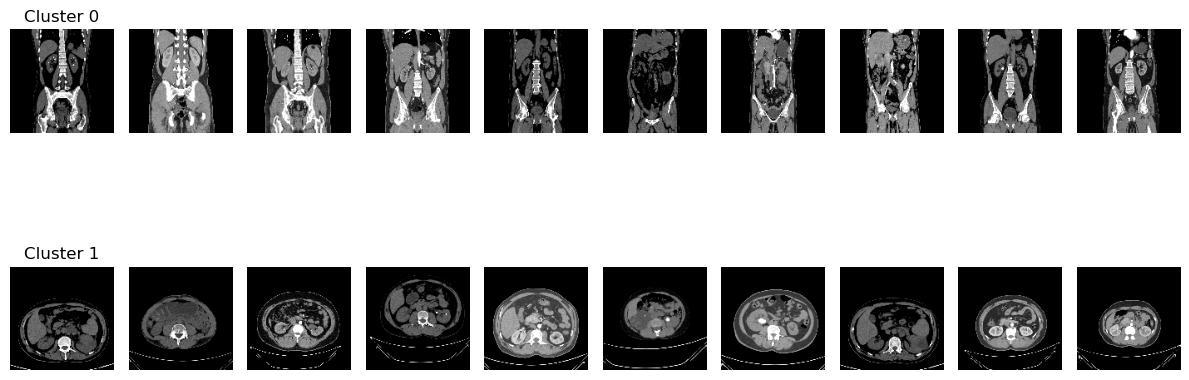

In [21]:
# Print 10 image samples for each cluster
num_samples = 10
fig, axs = plt.subplots(2, num_samples, figsize=(12, 6))
for i in range(2):
    cluster_indices = np.where(labels_pred == i)[0]
    sample_indices = np.random.choice(cluster_indices, num_samples, replace=False)
    for j, idx in enumerate(sample_indices):
        axs[i, j].imshow(images[idx])
        axs[i, j].axis("off")
        if j == 0:
            axs[i, j].set_title(f"Cluster {i}")
plt.tight_layout()
plt.show()

### CNN

In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
import pandas as pd
from imblearn.over_sampling import SMOTE
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
# reshape input data for cluster 0
X_train_cluster0 = X_train_cluster0.reshape((-1, 125, 125, 3))
X_val_cluster0 = X_val_cluster0.reshape((-1, 125, 125, 3))
X_test_cluster0 = X_test_cluster0.reshape((-1, 125, 125, 3))

In [18]:
# Build the model
model_cluster0 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(125, 125, 3), data_format="channels_last"),
    MaxPooling2D(pool_size=(2, 2), data_format="channels_last"),
    Conv2D(64, (3, 3), activation='relu', data_format="channels_last"),
    MaxPooling2D(pool_size=(2, 2), data_format="channels_last"),
    Conv2D(128, (3, 3), activation='relu', data_format="channels_last"),
    MaxPooling2D(pool_size=(2, 2), data_format="channels_last"),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes in the dataset
])

# Compile the model
model_cluster0.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=5,
                               restore_best_weights=True)

# Train the model
history_cluster0 = model_cluster0.fit(X_train_cluster0, y_train_cluster0,
                    epochs=50,
                    validation_data=(X_val_cluster0, y_val_cluster0),
                    callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss_cluster0, test_accuracy_cluster0 = model_cluster0.evaluate(X_test_cluster0, y_test_cluster0)
print(f"Test loss: {test_loss_cluster0:.4f}")
print(f"Test accuracy: {test_accuracy_cluster0:.4f}")

# Make predictions on the test set
y_pred_cluster0 = model_cluster0.predict(X_test_cluster0)
y_pred_cluster0 = np.argmax(y_pred_cluster0, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_cluster0, y_pred_cluster0)

# Print the confusion matrix
print(cm)

Epoch 1/50
108/108 [==============================] - 238s 2s/step - loss: 0.5329 - accuracy: 0.7899 - val_loss: 0.0463 - val_accuracy: 0.9921
Epoch 2/50
108/108 [==============================] - 171s 2s/step - loss: 0.0507 - accuracy: 0.9837 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 3/50
108/108 [==============================] - 171s 2s/step - loss: 0.0233 - accuracy: 0.9924 - val_loss: 7.9748e-04 - val_accuracy: 1.0000
Epoch 4/50
108/108 [==============================] - 195s 2s/step - loss: 0.0057 - accuracy: 0.9980 - val_loss: 8.8702e-04 - val_accuracy: 1.0000
Epoch 5/50
108/108 [==============================] - 154s 1s/step - loss: 0.0127 - accuracy: 0.9962 - val_loss: 6.0152e-04 - val_accuracy: 1.0000
Epoch 6/50
108/108 [==============================] - 197s 2s/step - loss: 0.0097 - accuracy: 0.9971 - val_loss: 2.0588e-04 - val_accuracy: 1.0000
Epoch 7/50
14/14 [==============================] - 8s 589ms/step - loss: 0.0063 - accuracy: 0.9976
Test loss: 0.0063
Test acc

In [19]:
model_cluster0.save('model_cluster0.h5')

In [11]:
# reshape input data for cluster 1
X_train_cluster1 = X_train_cluster1.reshape((-1, 125, 125, 3))
X_val_cluster1 = X_val_cluster1.reshape((-1, 125, 125, 3))
X_test_cluster1 = X_test_cluster1.reshape((-1, 125, 125, 3))

In [12]:
# Build the model
model_cluster1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(125, 125, 3), data_format="channels_last"),
    MaxPooling2D(pool_size=(2, 2), data_format="channels_last"),
    Conv2D(64, (3, 3), activation='relu', data_format="channels_last"),
    MaxPooling2D(pool_size=(2, 2), data_format="channels_last"),
    Conv2D(128, (3, 3), activation='relu', data_format="channels_last"),
    MaxPooling2D(pool_size=(2, 2), data_format="channels_last"),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes in the dataset
])

# Compile the model
model_cluster1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=5,
                               restore_best_weights=True)

# Train the model
history_cluster1 = model_cluster1.fit(X_train_cluster1, y_train_cluster1,
                    epochs=50,
                    validation_data=(X_val_cluster1, y_val_cluster1),
                    callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss_cluster1, test_accuracy_cluster1 = model_cluster1.evaluate(X_test_cluster1, y_test_cluster1)
print(f"Test loss: {test_loss_cluster1:.4f}")
print(f"Test accuracy: {test_accuracy_cluster1:.4f}")

# Make predictions on the test set
y_pred_cluster1 = model_cluster1.predict(X_test_cluster1)
y_pred_cluster1 = np.argmax(y_pred_cluster1, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_cluster1, y_pred_cluster1)

# Print the confusion matrix
print(cm)

Epoch 1/50
208/208 [==============================] - 346s 2s/step - loss: 0.2638 - accuracy: 0.9048 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 2/50
208/208 [==============================] - 402s 2s/step - loss: 0.0081 - accuracy: 0.9970 - val_loss: 9.4560e-04 - val_accuracy: 1.0000
Epoch 3/50
208/208 [==============================] - 359s 2s/step - loss: 0.0252 - accuracy: 0.9922 - val_loss: 7.8957e-04 - val_accuracy: 1.0000
Epoch 4/50
208/208 [==============================] - 297s 1s/step - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.0029 - val_accuracy: 0.9986
Epoch 5/50
208/208 [==============================] - 309s 1s/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 9.9111e-06 - val_accuracy: 1.0000
Epoch 6/50
26/26 [==============================] - 12s 479ms/step - loss: 0.0043 - accuracy: 0.9988
Test loss: 0.0043
Test accuracy: 0.9988
[[269   0   0   0]
 [  0 335   0   0]
 [  0   1  77   0]
 [  0   0   0 139]]


In [13]:
model_cluster1.save('model_cluster1.h5')

In [20]:
def add_noise(image, noise_factor=0.1):
    noisy_image = image + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=image.shape)
    return np.clip(noisy_image, 0., 1.)

# Add noise to the test dataset
noisy_X_test_cluster0 = np.array([add_noise(img) for img in X_test_cluster0])

# Make predictions on the noisy test dataset
noisy_y_pred_cluster0 = model_cluster0.predict(noisy_X_test_cluster0)
noisy_y_pred_labels_cluster0 = np.argmax(noisy_y_pred_cluster0, axis=1)

# Calculate accuracy on the noisy test dataset
noisy_test_accuracy_cluster0 = accuracy_score(y_test_cluster0, noisy_y_pred_labels_cluster0)
print(f"Noisy test accuracy: {noisy_test_accuracy_cluster0:.4f}")

# confusion matrix on the noisy test dataset
noisy_cm_cluster0 = confusion_matrix(y_test_cluster0, noisy_y_pred_labels_cluster0)
print("Confusion matrix for noisy test dataset:")
print(noisy_cm_cluster0)

Noisy test accuracy: 0.9976
Confusion matrix for noisy test dataset:
[[ 90   0   0   0]
 [  0 182   0   0]
 [  0   1  48   0]
 [  0   0   0 103]]


In [15]:
def add_noise(image, noise_factor=0.1):
    noisy_image = image + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=image.shape)
    return np.clip(noisy_image, 0., 1.)

# Add noise to the test dataset
noisy_X_test_cluster1 = np.array([add_noise(img) for img in X_test_cluster1])

# Make predictions on the noisy test dataset
noisy_y_pred_cluster1 = model_cluster1.predict(noisy_X_test_cluster1)
noisy_y_pred_labels_cluster1 = np.argmax(noisy_y_pred_cluster1, axis=1)

# Calculate accuracy on the noisy test dataset
noisy_test_accuracy_cluster1 = accuracy_score(y_test_cluster1, noisy_y_pred_labels_cluster1)
print(f"Noisy test accuracy: {noisy_test_accuracy_cluster1:.4f}")

# confusion matrix on the noisy test dataset
noisy_cm_cluster1 = confusion_matrix(y_test_cluster1, noisy_y_pred_labels_cluster1)
print("Confusion matrix for noisy test dataset:")
print(noisy_cm_cluster1)

Noisy test accuracy: 0.9988
Confusion matrix for noisy test dataset:
[[269   0   0   0]
 [  0 335   0   0]
 [  0   1  77   0]
 [  0   0   0 139]]


In [21]:
def add_extreme_noise(image, noise_factor=0.5):
    noisy_image = image + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=image.shape)
    return np.clip(noisy_image, 0., 1.)

# Add extreme noise to the test dataset
extremely_noisy_X_test_cluster0 = np.array([add_extreme_noise(img) for img in X_test_cluster0])

# Make predictions on the extremely noisy test dataset
extremely_noisy_y_pred_cluster0 = model_cluster0.predict(extremely_noisy_X_test_cluster0)
extremely_noisy_y_pred_labels_cluster0 = np.argmax(extremely_noisy_y_pred_cluster0, axis=1)

# Calculate accuracy on the extremely noisy test dataset
extremely_noisy_test_accuracy_cluster0 = accuracy_score(y_test_cluster0, extremely_noisy_y_pred_labels_cluster0)
print(f"Extremely noisy test accuracy: {extremely_noisy_test_accuracy_cluster0:.4f}")

# confusion matrix on the noisy test dataset
extremely_noisy_cm_cluster0 = confusion_matrix(y_test_cluster0, extremely_noisy_y_pred_labels_cluster0)
print("Confusion matrix for noisy test dataset:")
print(extremely_noisy_cm_cluster0)

Extremely noisy test accuracy: 0.6792
Confusion matrix for noisy test dataset:
[[ 72  14   4   0]
 [  0 182   0   0]
 [  0  19  30   0]
 [ 21  73   5   4]]


In [16]:
def add_extreme_noise(image, noise_factor=0.5):
    noisy_image = image + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=image.shape)
    return np.clip(noisy_image, 0., 1.)

# Add extreme noise to the test dataset
extremely_noisy_X_test_cluster1 = np.array([add_extreme_noise(img) for img in X_test_cluster1])

# Make predictions on the extremely noisy test dataset
extremely_noisy_y_pred_cluster1 = model_cluster1.predict(extremely_noisy_X_test_cluster1)
extremely_noisy_y_pred_labels_cluster1 = np.argmax(extremely_noisy_y_pred_cluster1, axis=1)

# Calculate accuracy on the extremely noisy test dataset
extremely_noisy_test_accuracy_cluster1 = accuracy_score(y_test_cluster1, extremely_noisy_y_pred_labels_cluster1)
print(f"Extremely noisy test accuracy: {extremely_noisy_test_accuracy_cluster1:.4f}")

# confusion matrix on the noisy test dataset
extremely_noisy_cm_cluster1 = confusion_matrix(y_test_cluster1, extremely_noisy_y_pred_labels_cluster1)
print("Confusion matrix for noisy test dataset:")
print(extremely_noisy_cm_cluster1)

Extremely noisy test accuracy: 0.7101
Confusion matrix for noisy test dataset:
[[269   0   0   0]
 [ 31 164  74  66]
 [ 34   8  35   1]
 [ 24   0   0 115]]


### CNN Cluster 0 LIME

In [45]:
# from tensorflow.keras.models import load_model
# model_cluster0 = load_model('model_cluster0.h5')

# # Evaluate the model on the test set
# test_loss_cluster0, test_accuracy_cluster0 = model_cluster0.evaluate(X_test_cluster0, y_test_cluster0)
# print(f"Test loss: {test_loss_cluster0:.4f}")
# print(f"Test accuracy: {test_accuracy_cluster0:.4f}")

# # Make predictions on the test set
# y_pred_cluster0 = model_cluster0.predict(X_test_cluster0)
# y_pred_cluster0 = np.argmax(y_pred_cluster0, axis=1)

14/14 [==============================] - 4s 288ms/step - loss: 0.0063 - accuracy: 0.2123
Test loss: 0.0063
Test accuracy: 0.2123


In [42]:
from lime import lime_image

In [23]:
explainer = lime_image.LimeImageExplainer(random_state=123)

explainer

In [24]:
preds = model_cluster0.predict(X_test_cluster0)
pred_indices = preds.argmax(axis=1)

Explain Class 0

In [26]:
class_1_indices = np.where(pred_indices == 0)[0]
class_1_indices[0]

2

In [28]:
y_test_cluster0[2]

0

In [29]:
idx = 2

In [32]:
explanation = explainer.explain_instance(X_test_cluster0[idx].astype('double'), model_cluster0.predict)

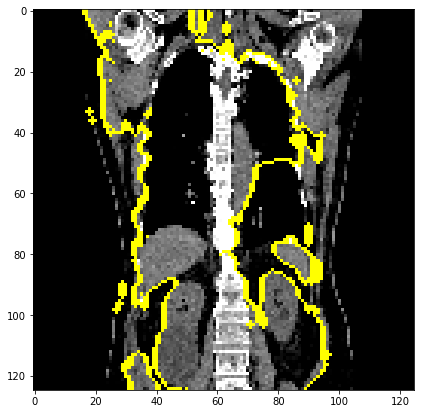

In [35]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 7))

ax.imshow(X_test_cluster0[idx])
image, mask = explanation.get_image_and_mask(
         model_cluster0.predict(
              X_test_cluster0[idx].reshape((1,125,125,3))
         ).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=False)
ax.imshow(mark_boundaries(image, mask))

Explain Class 1

In [36]:
class_1_indices = np.where(pred_indices == 1)[0]
class_1_indices[0]

3

In [37]:
y_test_cluster0[3]

1

In [96]:
idx = 3

In [97]:
explanation = explainer.explain_instance(X_test_cluster0[idx].astype('double'), model_cluster0.predict)

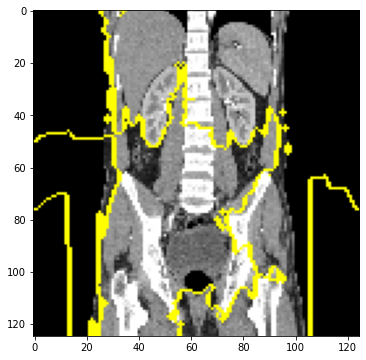

In [98]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

ax.imshow(X_test_cluster0[idx])
image, mask = explanation.get_image_and_mask(
         model_cluster0.predict(
              X_test_cluster0[idx].reshape((1,125,125,3))
         ).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=False)
ax.imshow(mark_boundaries(image, mask))

Class 2

In [41]:
class_1_indices = np.where(pred_indices == 2)[0]
class_1_indices[0]

0

In [43]:
y_test_cluster0[0]

2

In [44]:
idx = 0

In [45]:
explanation = explainer.explain_instance(X_test_cluster0[idx].astype('double'), model_cluster0.predict)

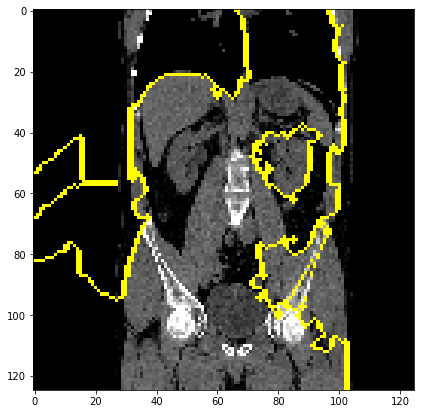

In [46]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 7))

ax.imshow(X_test_cluster0[idx])
image, mask = explanation.get_image_and_mask(
         model_cluster0.predict(
              X_test_cluster0[idx].reshape((1,125,125,3))
         ).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=False)
ax.imshow(mark_boundaries(image, mask))

Class 3

In [88]:
class_1_indices = np.where(pred_indices == 3)[0]
class_1_indices[3]

45

In [89]:
y_test_cluster0[45]

3

In [99]:
idx = 45

In [100]:
explanation = explainer.explain_instance(X_test_cluster0[idx].astype('double'), model_cluster0.predict)

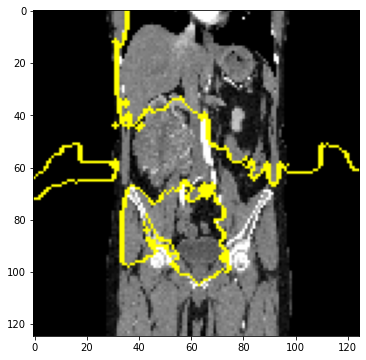

In [101]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

ax.imshow(X_test_cluster0[idx])
image, mask = explanation.get_image_and_mask(
         model_cluster0.predict(
              X_test_cluster0[idx].reshape((1,125,125,3))
         ).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=False)
ax.imshow(mark_boundaries(image, mask))

### CNN Cluster 1 with LIME

In [53]:
preds = model_cluster1.predict(X_test_cluster1)
pred_indices = preds.argmax(axis=1)

Explain class 0 

In [54]:
class_1_indices = np.where(pred_indices == 0)[0]
class_1_indices[0]

4

In [55]:
y_test_cluster1[4]

0

In [56]:
idx = 4

In [57]:
explanation = explainer.explain_instance(X_test_cluster1[idx].astype('double'), model_cluster1.predict)

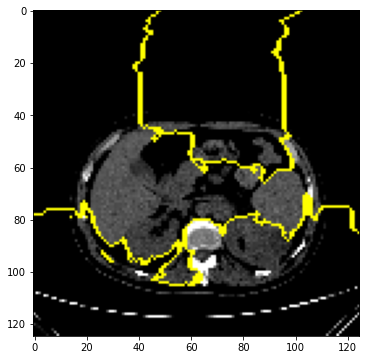

In [58]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

ax.imshow(X_test_cluster1[idx])
image, mask = explanation.get_image_and_mask(
         model_cluster1.predict(
              X_test_cluster1[idx].reshape((1,125,125,3))
         ).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=False)
ax.imshow(mark_boundaries(image, mask))

Class 1

In [59]:
class_1_indices = np.where(pred_indices == 1)[0]
class_1_indices[0]

0

In [60]:
y_test_cluster1[0]

1

In [61]:
idx = 0 

In [62]:
explanation = explainer.explain_instance(X_test_cluster1[idx].astype('double'), model_cluster1.predict)

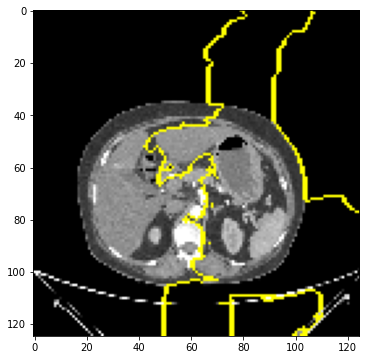

In [63]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

ax.imshow(X_test_cluster1[idx])
image, mask = explanation.get_image_and_mask(
         model_cluster1.predict(
              X_test_cluster1[idx].reshape((1,125,125,3))
         ).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=False)
ax.imshow(mark_boundaries(image, mask))

Class 2

In [64]:
class_1_indices = np.where(pred_indices == 2)[0]
class_1_indices[0]

12

In [65]:
y_test_cluster1[12]

2

In [66]:
idx = 12

In [67]:
explanation = explainer.explain_instance(X_test_cluster1[idx].astype('double'), model_cluster1.predict)

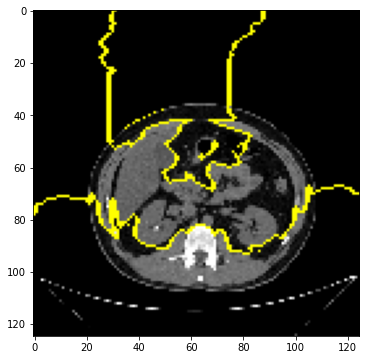

In [68]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

ax.imshow(X_test_cluster1[idx])
image, mask = explanation.get_image_and_mask(
         model_cluster1.predict(
              X_test_cluster1[idx].reshape((1,125,125,3))
         ).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=False)
ax.imshow(mark_boundaries(image, mask))

Class 3

In [69]:
class_1_indices = np.where(pred_indices == 3)[0]
class_1_indices[0]

2

In [70]:
y_test_cluster1[2]

3

In [73]:
idx = 2

In [74]:
explanation = explainer.explain_instance(X_test_cluster1[idx].astype('double'), model_cluster1.predict)

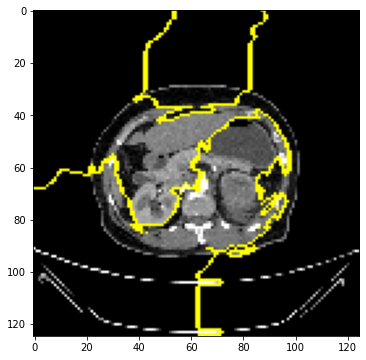

In [75]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

ax.imshow(X_test_cluster1[idx])
image, mask = explanation.get_image_and_mask(
         model_cluster1.predict(
              X_test_cluster1[idx].reshape((1,125,125,3))
         ).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=False)
ax.imshow(mark_boundaries(image, mask))